In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
his = pd.read_csv("/content/historic.csv")
his

item_no    category       main_promotion   color  stars  \
0      739157       Tunic              Catalog   Green    3.1   
1      591846      Hoodie   Category_Highlight     Red    1.5   
2      337574  Sweatshirt              Catalog     Red    4.4   
3      401933  Polo-Shirt   Category_Highlight    Blue    3.1   
4      812151      Hoodie   Category_Highlight   Green    4.1   
...       ...         ...                  ...     ...    ...   
7995   280947     T-Shirt              Catalog    Blue    3.9   
7996   874952  Sweatshirt     Frontpage_Header   Green    3.5   
7997   891640     T-Shirt   Category_Highlight  Yellow    4.0   
7998   786448      Blouse   Category_Highlight    Blue    2.6   
7999   847223  Sweatshirt  Display_Ad_Campaign    Blue    3.9   

     success_indicator  
0                 flop  
1                 flop  
2                  top  
3                 flop  
4                  top  
...                ...  
7995              flop  
7996               top  
7997              flop  
7998              flop  
7999               top  

[8000 rows x 6 columns]

**Check the Dimensions of the provided dataset**

In [25]:
his.shape

(8000, 6)

**Since it is easier to deal with numbers in the main target column that is "success_indicator" the values for Flop is assigned as '0' and for Top it is assigned as '1'**

In [26]:
his['success_indicator'] = his['success_indicator'].map({'top': 1, 'flop': 0})

print(his)

      item_no    category       main_promotion   color  stars  \
0      739157       Tunic              Catalog   Green    3.1   
1      591846      Hoodie   Category_Highlight     Red    1.5   
2      337574  Sweatshirt              Catalog     Red    4.4   
3      401933  Polo-Shirt   Category_Highlight    Blue    3.1   
4      812151      Hoodie   Category_Highlight   Green    4.1   
...       ...         ...                  ...     ...    ...   
7995   280947     T-Shirt              Catalog    Blue    3.9   
7996   874952  Sweatshirt     Frontpage_Header   Green    3.5   
7997   891640     T-Shirt   Category_Highlight  Yellow    4.0   
7998   786448      Blouse   Category_Highlight    Blue    2.6   
7999   847223  Sweatshirt  Display_Ad_Campaign    Blue    3.9   

      success_indicator  
0                     0  
1                     0  
2                     1  
3                     0  
4                     1  
...                 ...  
7995                  0  
7996       

**The provied dataset already has cleaned data. There are no Null values or missing value as checked.**

In [31]:
print(his.isnull().sum())

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64


**Therefore there is no cleaning or pre-processing of the data required. The EDA process regarding cleaning and making the dataset suitable for model training is not needed in this dataset. We can use the Visualization and Comparission techniques to understand the dataset more. How the variables are dependent on each other. How one column affects the other column. For this we can use various virtulization libraries like Matplotlib and seaborn. The below virtulization presents the nature of data and how it is related to other columns**

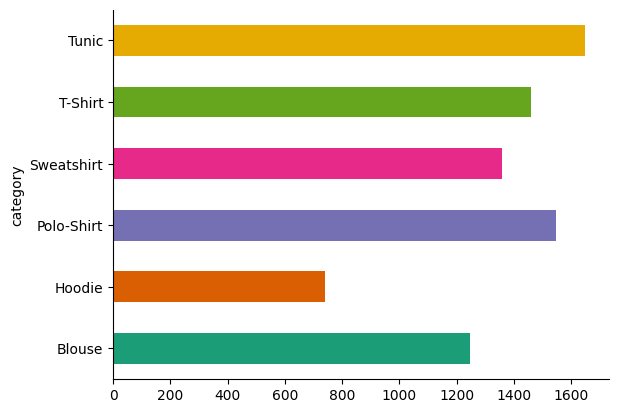

In [27]:
his.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

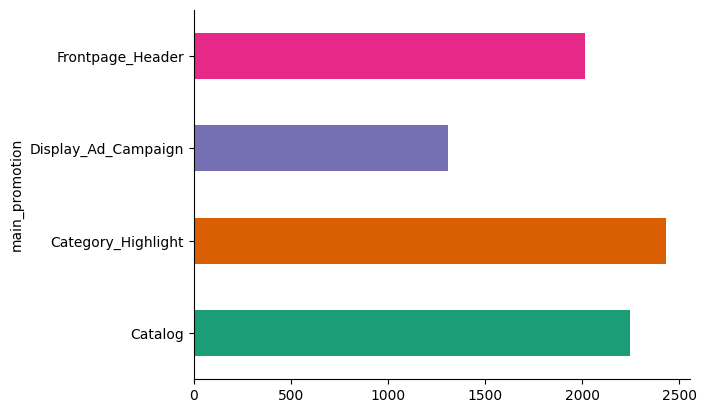

In [28]:
his.groupby('main_promotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

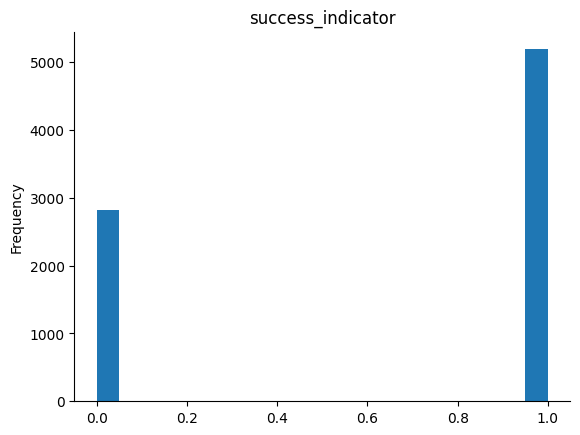

In [29]:
his['success_indicator'].plot(kind='hist', bins=20, title='success_indicator')
plt.gca().spines[['top', 'right',]].set_visible(False)

**The heatmap shows the co dependencies of the columns and the variales with eachother. The darker regionhs shows high dependencies and the lighter region shows lower dependies. Based on this we can decide which variable affects the other variale most and if there are any variable or column that can be discarded or removed. **

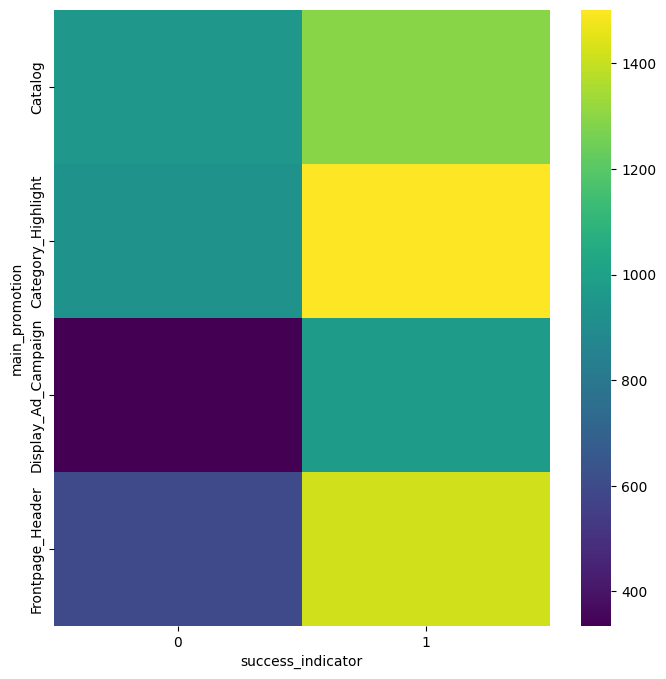

In [32]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['main_promotion'].value_counts()
    for x_label, grp in his.groupby('success_indicator')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('success_indicator')
_ = plt.ylabel('main_promotion')

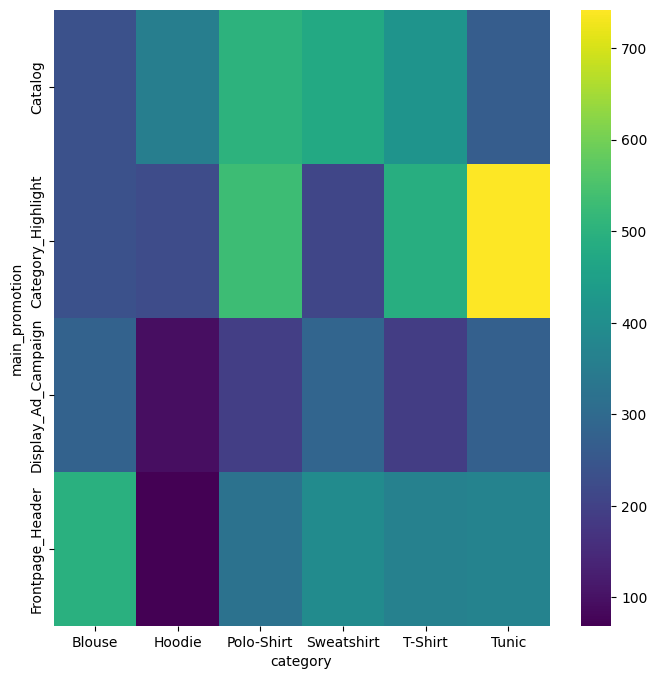

In [30]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['main_promotion'].value_counts()
    for x_label, grp in his.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('main_promotion')